# Pokémon Analysis
**Authors:** Ricky Wong
***

## Overview
With the new Pokémon Scarlet and Violet’s release just around the corner, the competitive Pokémon community are eager to get an edge over the other players by finding the strongest Pokémon. Using linear regression we can highlight two variables that affect the attack of a Pokémon.

### Business Understanding
To get an edge over other players, the enthusiast players would like to predict the attack stats of the next generation Pokémon to see if they are worth using. However, the stats of a Pokémon is not the only variable to consider. Our model will not factor in the moves/skills, items or other game mechanics..


In [1]:
#import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [2]:
#read data from file
pokemon_df = pd.read_csv('data/Pokemon.csv')

### Data Understanding
We have obtained the data from Kaggle which uses the Pokémon official site as well as community sites. The data is accurate as it has been extracted from the games. We can see each stat of a Pokémon as well as the name, type, generation and if the Pokémon is legendary or not. <br />
After getting an idea of the data we are dealing with we can see the only null values are from type 2 which is accurate as not all Pokémon have a second type. 


In [3]:
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
pokemon_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Checking the stats between legendary and non-legendary Pokémon we can see they are not too different with highest total stats for legendary is 780 and normal Pokémon highest is 700. Legendary has a larger mean as they don't have to evolve. We can keep legendary Pokémon in our analysis.

In [6]:
# check stats for non-legendary
pokemon_df.loc[pokemon_df['Legendary'] == True].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


In [7]:
# check stats for non-legendary
pokemon_df.loc[pokemon_df['Legendary'] == False].describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
std,208.590419,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,175.500000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,346.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000
75%,533.500000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000
max,715.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000


Other observations:
- There are a total of 18 unique Pokémon types.
- Histogram shows the data is slightly positively skewed.
- Hp, defence and special defence has some outliers we can remove


In [8]:
# number of unique types
unique = pokemon_df['Type 1'].unique()
print(unique)
len(unique)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


18

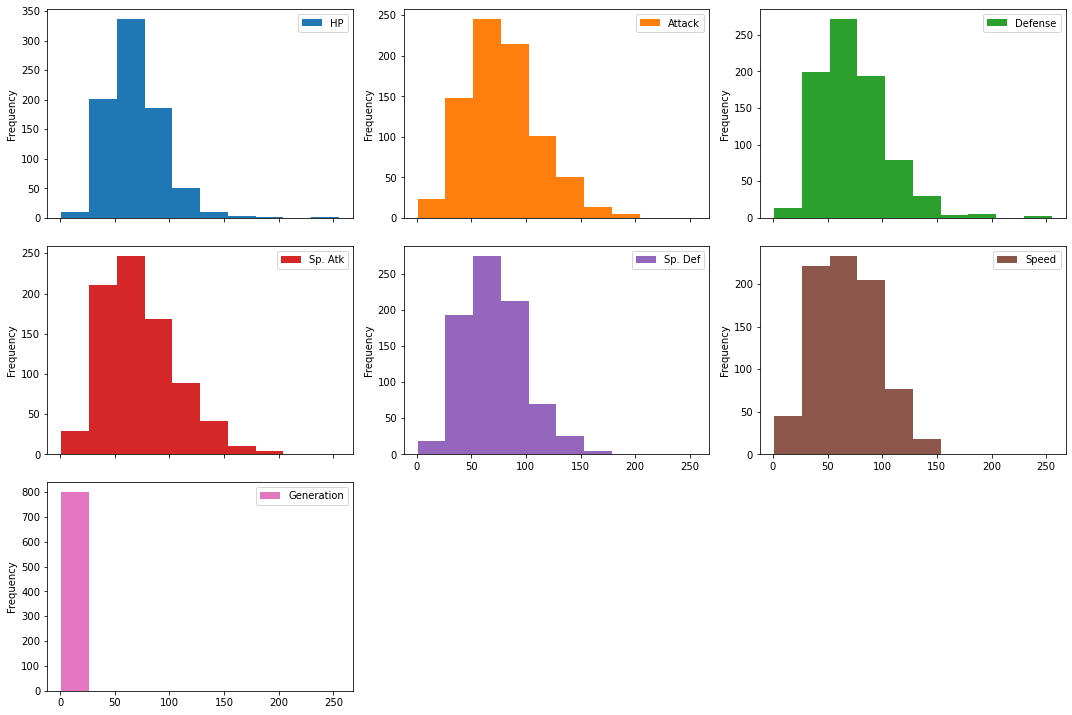

In [9]:
# We will be removing Total as that is all the stats added together.
pokemon_df.iloc[:,5:12].plot.hist(subplots = True, layout=(3,3), figsize=(15,10))
plt.tight_layout()
plt.show()

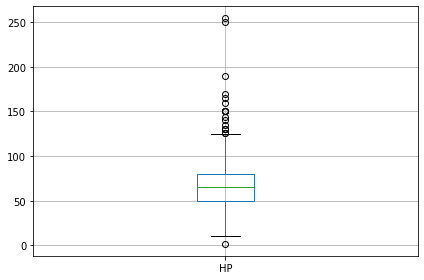

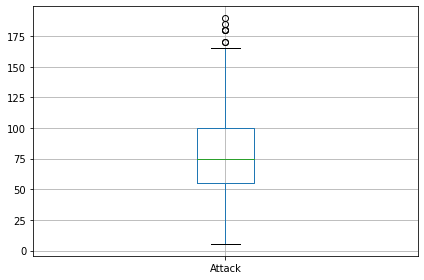

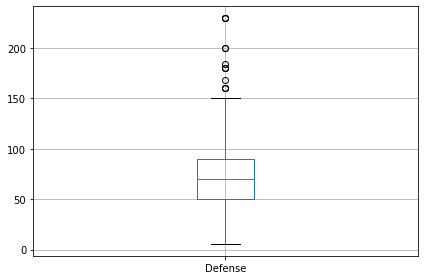

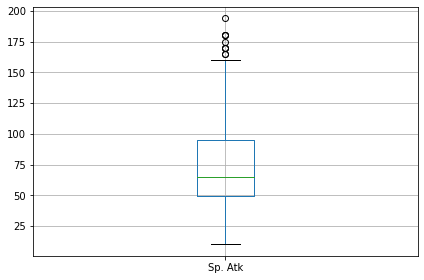

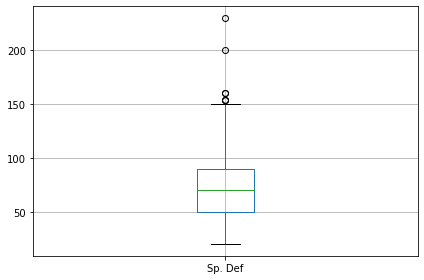

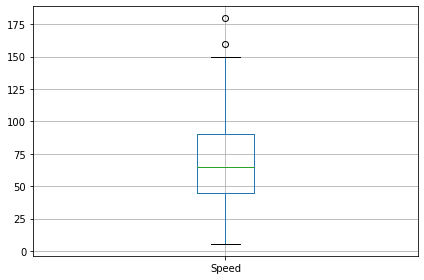

In [10]:
# box plots of stats
columns = pokemon_df.iloc[:,5:11].columns

for c in columns:
    pokemon_df[[c]].boxplot()
    plt.tight_layout()
    plt.show()

In [11]:
# outliers to remove
remove_pokemon1 = pokemon_df[pokemon_df['HP'] >= 200]
remove_pokemon2 =pokemon_df[pokemon_df['Defense'] >= 200]
remove_pokemon3 =pokemon_df[pokemon_df['Sp. Def'] >= 200]

remove_pokemon = pd.concat([remove_pokemon1, remove_pokemon2, remove_pokemon3], axis=0).drop_duplicates()
remove_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True


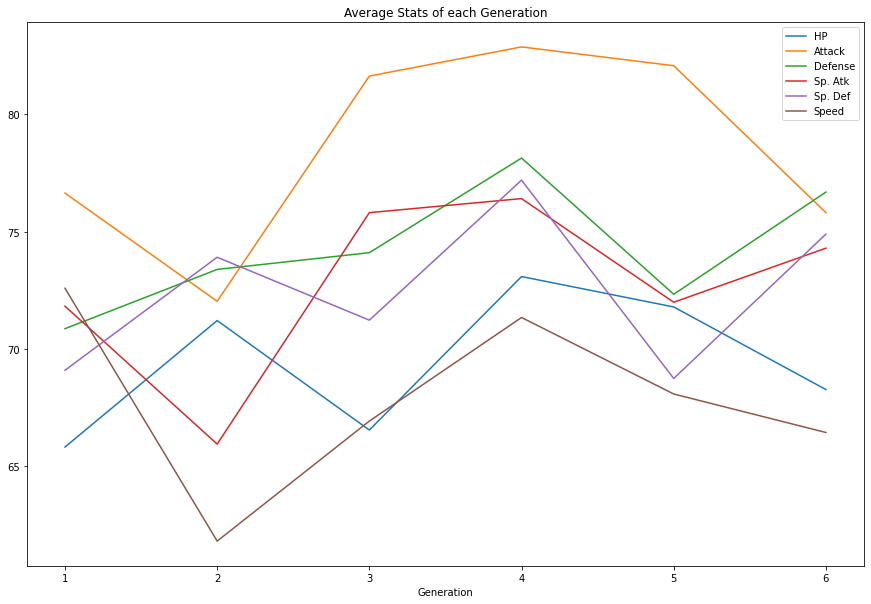

In [12]:
# average stats for each generation
pokemon_stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
pokemon_stats_by_generation = pokemon_df.groupby('Generation').mean()[pokemon_stats]
pokemon_stats_by_generation.plot.line(figsize=(15,10), title='Average Stats of each Generation');

### Data Preparation
We will start to go through the data and make changes that fit our needs like removing outliers, mega evolutions as that is part of a game mechanic and is not in every Pokémon game and other columns we don’t need like the index number and name. Type 2 will be converted to <b>1</b> if it has a second type and <b>0</b> if they don't. Total will need to be removed as well because that is just the other stats added up.

In [13]:
pokemon_clean_df = pokemon_df.copy(deep=True)
pokemon_clean_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [14]:
# Remove outliers
pokemon_clean_df.drop(remove_pokemon['Name'].index, axis=0, inplace=True)

In [15]:
# remove mega evolutions
pokemon_clean_df.drop(pokemon_clean_df[pokemon_clean_df['Name'].str.contains('Mega')].index, inplace=True)

In [16]:
# New binary column for pokemon with second type
pokemon_clean_df['Has Type 2'] = np.where(pokemon_clean_df["Type 2"].isnull(), 0, 1)
pokemon_clean_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Has Type 2
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,1
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,0


In [17]:
# remove pokedex number, name, type 2, total, legendary 
pokemon_clean_df.drop(['#','Name','Type 2','Total','Legendary'], axis=1, inplace=True)
pokemon_clean_df.reset_index(drop=True, inplace=True)
pokemon_clean_df.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Type 2
0,Grass,45,49,49,65,65,45,1,1
1,Grass,60,62,63,80,80,60,1,1
2,Grass,80,82,83,100,100,80,1,1
3,Fire,39,52,43,60,50,65,1,0
4,Fire,58,64,58,80,65,80,1,0


### Multicollinearity check
- No correlations over 0.75 with other predictors.
- HP and defence are highly correlated with our dependant variable attack

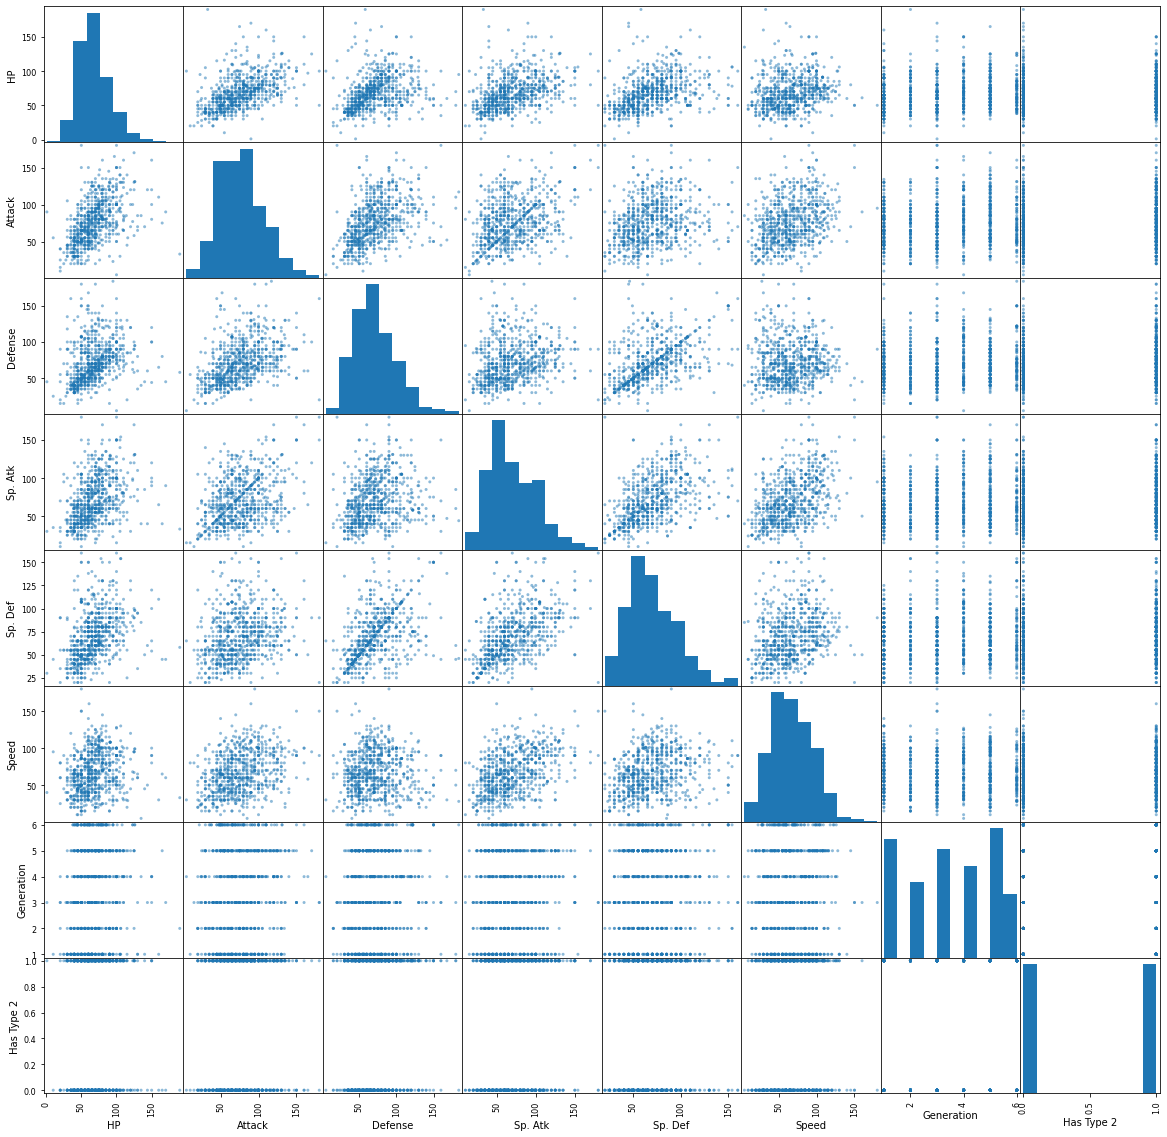

In [18]:
stat_predictors = pokemon_clean_df.iloc[:,1:9]
pd.plotting.scatter_matrix(stat_predictors, figsize  = [20, 20]);
plt.show()

In [19]:
# none over 0.75
stat_predictors.corr().style.background_gradient(cmap='coolwarm')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Type 2
HP,1.000000,0.511040,0.318909,0.405698,0.393469,0.193413,0.106463,0.072524
Attack,0.511040,1.000000,0.436548,0.376459,0.253266,0.347043,0.099621,0.083202
Defense,0.318909,0.436548,1.000000,0.234861,0.503284,0.035755,0.095425,0.165694
Sp. Atk,0.405698,0.376459,0.234861,1.000000,0.529399,0.455270,0.086140,0.110084
Sp. Def,0.393469,0.253266,0.503284,0.529399,1.000000,0.276801,0.083481,0.111262
Speed,0.193413,0.347043,0.035755,0.455270,0.276801,1.000000,0.011523,0.063425
Generation,0.106463,0.099621,0.095425,0.086140,0.083481,0.011523,1.000000,0.071125
Has Type 2,0.072524,0.083202,0.165694,0.110084,0.111262,0.063425,0.071125,1.000000


### Normal distribution of data
- Data looks molstly normal with a slight positive skew.

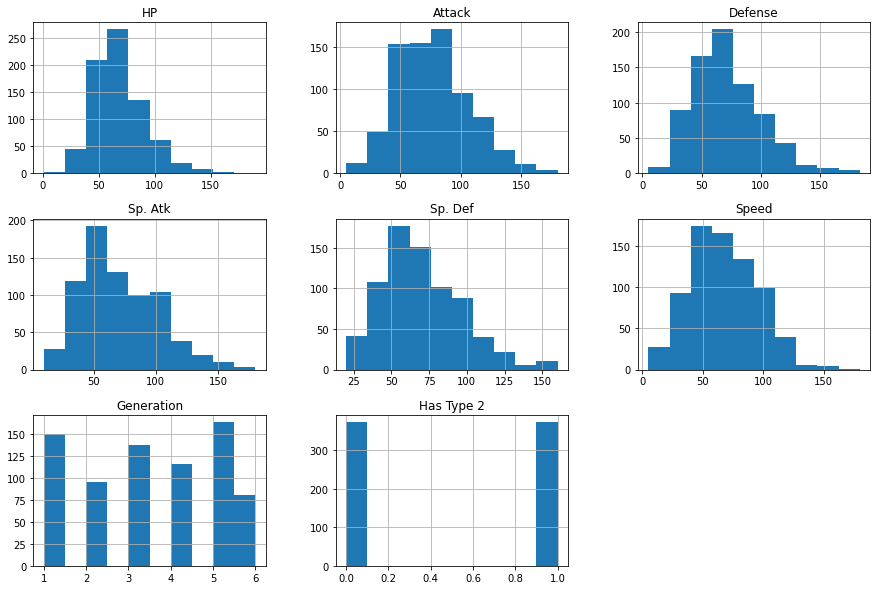

In [20]:
stat_predictors.hist(figsize=(15,10));

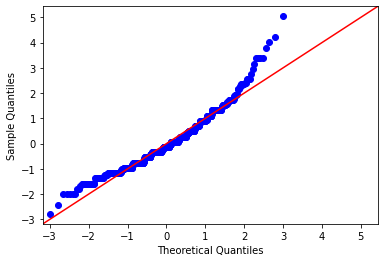

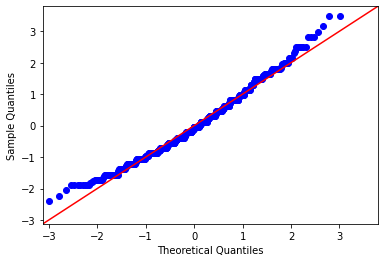

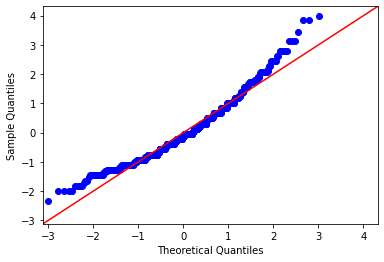

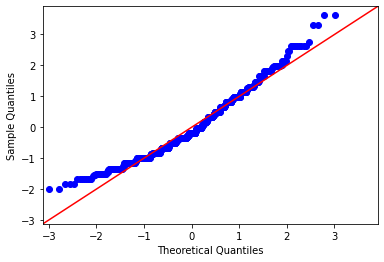

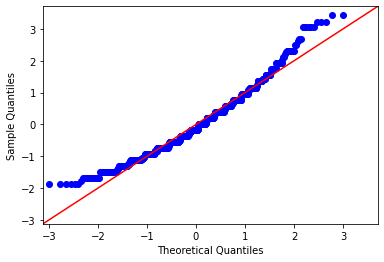

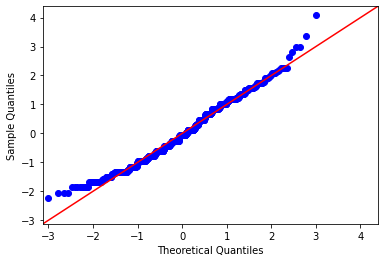

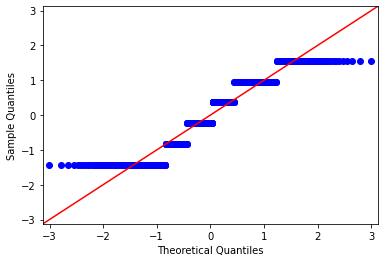

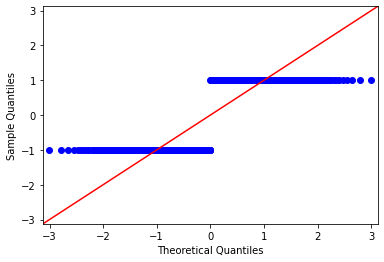

In [21]:
# QQ-Plots
columns = stat_predictors.columns
for c in columns:
    sm.graphics.qqplot(stat_predictors[c], dist=stats.norm, line='45', fit=True)

### One hot encode
For linear regression, categorical data should be transformed using one-hot encoding.

In [22]:
# dummy variables
type_dum = pd.get_dummies(pokemon_clean_df['Type 1'], prefix='type', drop_first=True)
gen_dum = pd.get_dummies(pokemon_clean_df['Generation'], prefix='gen', drop_first=True)

# add dummy variables
pokemon_df = pd.concat([stat_predictors.iloc[:,0:6], stat_predictors['Has Type 2'], type_dum, gen_dum], axis=1) 


### Modeling

In [23]:
dependent = pokemon_df['Attack']
predictors = pokemon_df.drop(['Attack'], axis=1)

#### Model 1
For the first model we use all the predictors that we think should be useful to our model. With an R-Squared value of 0.530 we can explain 53% of the variations of our model. There are quite a few predictors with a P-value over 0.05 which we can remove from our model.

In [24]:
#all predictors
predictors_int = sm.add_constant(predictors)
model = sm.OLS(dependent, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attack   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     29.07
Date:                Sat, 25 Jun 2022   Prob (F-statistic):           8.32e-99
Time:                        20:30:23   Log-Likelihood:                -3300.2
No. Observations:                 745   AIC:                             6658.
Df Residuals:                     716   BIC:                             6792.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9300      4.108      1.444      0.149      -2.134      13.994
HP                0.4026      0.038     10.479      0.000       0.327       0.478
Defense           0.3526      0.036      9.898      0.000       0.283       0.423
Sp. Atk           0.2311      0.037      6.312      0.000       0.159       0.303
Sp. Def          -0.2350      0.040     -5.889      0.000      -0.313      -0.157
Speed             0.2666      0.033      8.184      0.000       0.203       0.331
Has Type 2       -2.7049      1.649     -1.640      0.101      -5.943       0.533
type_Dark         8.4933      4.755      1.786      0.074      -0.842      17.828
type_Dragon      17.0461      4.970      3.430      0.001       7.290      26.803
type_Electric   -10.0813      4.323     -2.332      0.020     -18.569      -1.594
type_Fairy       -7.8512      6.084     -1.290      0.197     -19.796       4.094
type_Fighting    23.9155      5.025      4.759      0.000      14.049      33.782
type_Fire         1.4326      4.133      0.347      0.729      -6.682       9.547
type_Flying     -11.1469     10.870     -1.025      0.305     -32.487      10.193
type_Ghost       -5.0243      4.706     -1.068      0.286     -14.264       4.215
type_Grass       -3.3612      3.719     -0.904      0.366     -10.663       3.941
type_Ground      14.5622      4.571      3.186      0.002       5.589      23.536
type_Ice         -5.2251      5.189     -1.007      0.314     -15.413       4.962
type_Normal      -0.0872      3.528     -0.025      0.980      -7.013       6.838
type_Poison       2.0323      4.790      0.424      0.672      -7.373      11.437
type_Psychic    -14.7508      4.146     -3.558      0.000     -22.890      -6.611
type_Rock        12.4584      4.313      2.889      0.004       3.992      20.925
type_Steel        3.5702      5.370      0.665      0.506      -6.973      14.114
type_Water       -6.1163      3.388     -1.805      0.071     -12.767       0.535
gen_2            -0.2169      2.787     -0.078      0.938      -5.689       5.255
gen_3             2.4176      2.507      0.964      0.335      -2.505       7.340
gen_4             1.8536      2.627      0.706      0.481      -3.305       7.012
gen_5             3.7170      2.435      1.526      0.127      -1.064       8.498
gen_6            -0.9092      3.030     -0.300      0.764      -6.859       5.041
==============================================================================
Omnibus:                       59.386   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.607
Skew:                           0.556   Prob(JB):                     2.35e-22
Kurtosis:                       4.405   Cond. No.                     2.67e+03
================================================================

In [25]:
# sort predictors by P-value

coefs = pd.DataFrame({
    'coef': model.params.values,
    'pvalue': round(model.pvalues, 2),
    'name': model.params.index
}).sort_values(by='pvalue', ascending=False)
coefs

,coef,pvalue,name
type_Normal,-0.087166,0.98,type_Normal
gen_2,-0.216896,0.94,gen_2
gen_6,-0.909152,0.76,gen_6
type_Fire,1.432624,0.73,type_Fire
type_Poison,2.032252,0.67,type_Poison
type_Steel,3.570218,0.51,type_Steel
gen_4,1.853621,0.48,gen_4
type_Grass,-3.361231,0.37,type_Grass
gen_3,2.417649,0.34,gen_3
type_Ice,-5.225102,0.31,type_Ice


In [26]:
# drop predictors with p-values over 0.05
drop_columns = coefs[coefs['pvalue'] > 0.05]['name'].values
drop_columns = drop_columns[drop_columns != 'const']
pokemon_df2 = pokemon_df.drop(drop_columns, axis=1)
predictors = pokemon_df2.drop(['Attack'], axis=1)

#### Model 2
After removing the high p-values we still have a few predictors that can be removed. We check our data for multicollinearity which there isn't. We also run a min max scaler so that the stats are all on the same scale. Recursive Feature Elimination helps us find the best predictors to remove. 

In [27]:
#Removed high p-values
predictors_int = sm.add_constant(predictors)
model = sm.OLS(dependent, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attack   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     70.47
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          4.97e-107
Time:                        20:30:23   Log-Likelihood:                -3314.3
No. Observations:                 745   AIC:                             6653.
Df Residuals:                     733   BIC:                             6708.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9010      3.084      1.589      0.112      -1.154      10.956
HP                0.4053      0.037     10.963      0.000       0.333       0.478
Defense           0.3606      0.034     10.713      0.000       0.295       0.427
Sp. Atk           0.2121      0.035      6.144      0.000       0.144       0.280
Sp. Def          -0.2507      0.040     -6.336      0.000      -0.328      -0.173
Speed             0.2815      0.031      8.949      0.000       0.220       0.343
type_Dragon      19.4756      4.236      4.598      0.000      11.160      27.791
type_Electric    -7.8479      3.451     -2.274      0.023     -14.623      -1.073
type_Fighting    26.1335      4.322      6.047      0.000      17.649      34.618
type_Ground      16.1127      3.873      4.160      0.000       8.509      23.716
type_Psychic    -11.6910      3.143     -3.719      0.000     -17.862      -5.520
type_Rock        12.9333      3.559      3.634      0.000       5.947      19.920
==============================================================================
Omnibus:                       55.597   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.354
Skew:                           0.553   Prob(JB):                     1.77e-19
Kurtosis:                       4.249   Cond. No.                         942.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pokemon_df2.corr().style.background_gradient(cmap='coolwarm')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,type_Dragon,type_Electric,type_Fighting,type_Ground,type_Psychic,type_Rock
HP,1.000000,0.511040,0.318909,0.405698,0.393469,0.193413,0.105920,-0.094831,0.015720,0.048938,0.016679,-0.039974
Attack,0.511040,1.000000,0.436548,0.376459,0.253266,0.347043,0.189920,-0.065126,0.116010,0.139245,-0.094344,0.095769
Defense,0.318909,0.436548,1.000000,0.234861,0.503284,0.035755,0.060911,-0.054438,-0.046578,0.101679,-0.045952,0.219217
Sp. Atk,0.405698,0.376459,0.234861,1.000000,0.529399,0.455270,0.106504,0.136066,-0.134299,-0.097248,0.208846,-0.079147
Sp. Def,0.393469,0.253266,0.503284,0.529399,1.000000,0.276801,0.104303,0.029193,-0.041660,-0.054864,0.147641,0.025815
Speed,0.193413,0.347043,0.035755,0.455270,0.276801,1.000000,0.077015,0.153181,-0.026427,-0.022223,0.102411,-0.127248
type_Dragon,0.105920,0.189920,0.060911,0.106504,0.104303,0.077015,1.000000,-0.046480,-0.035434,-0.040286,-0.052090,-0.045296
type_Electric,-0.094831,-0.065126,-0.054438,0.136066,0.029193,0.153181,-0.046480,1.000000,-0.045546,-0.051782,-0.066955,-0.058221
type_Fighting,0.015720,0.116010,-0.046578,-0.134299,-0.041660,-0.026427,-0.035434,-0.045546,1.000000,-0.039476,-0.051043,-0.044385
type_Ground,0.048938,0.139245,0.101679,-0.097248,-0.054864,-0.022223,-0.040286,-0.051782,-0.039476,1.000000,-0.058032,-0.050462


#### Standardise data

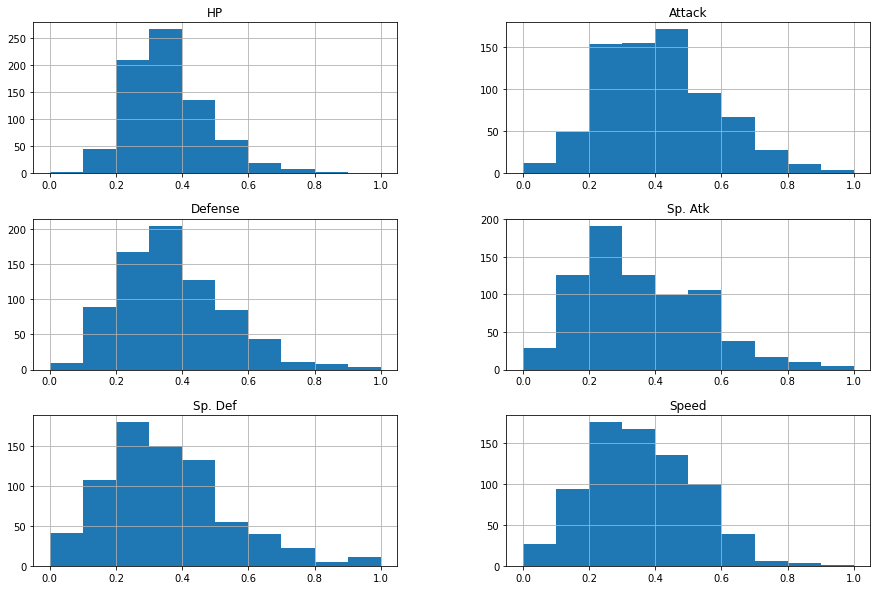

In [29]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(stat_predictors.iloc[:,0:6])
data = pd.DataFrame(scaled, columns=stat_predictors.iloc[:,0:6].columns)
data.hist(figsize=(15,10))
plt.show()

In [30]:
pokemon_df3 = pd.concat([data, predictors.iloc[:,5:11]], axis=1) 
pokemon_df3

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,type_Dragon,type_Electric,type_Fighting,type_Ground,type_Psychic,type_Rock
0,0.232804,0.251429,0.245810,0.323529,0.321429,0.228571,0,0,0,0,0,0
1,0.312169,0.325714,0.324022,0.411765,0.428571,0.314286,0,0,0,0,0,0
2,0.417989,0.440000,0.435754,0.529412,0.571429,0.428571,0,0,0,0,0,0
3,0.201058,0.268571,0.212291,0.294118,0.214286,0.342857,0,0,0,0,0,0
4,0.301587,0.337143,0.296089,0.411765,0.321429,0.428571,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.566138,0.542857,0.648045,0.417647,0.535714,0.514286,1,0,0,0,0,0
741,0.259259,0.542857,0.810056,0.529412,0.928571,0.257143,0,0,0,0,0,1
742,0.417989,0.600000,0.307263,0.823529,0.785714,0.371429,0,0,0,0,1,0
743,0.417989,0.885714,0.307263,0.941176,0.785714,0.428571,0,0,0,0,1,0


#### RFE
Recursive Feature Elimination 

In [31]:
rfe_df = pokemon_df3.copy(deep=True)
rfe_pred = rfe_df.drop('Attack',axis=1)
rfe_pred.head()

,HP,Defense,Sp. Atk,Sp. Def,Speed,type_Dragon,type_Electric,type_Fighting,type_Ground,type_Psychic,type_Rock
0,0.232804,0.245810,0.323529,0.321429,0.228571,0,0,0,0,0,0
1,0.312169,0.324022,0.411765,0.428571,0.314286,0,0,0,0,0,0
2,0.417989,0.435754,0.529412,0.571429,0.428571,0,0,0,0,0,0
3,0.201058,0.212291,0.294118,0.214286,0.342857,0,0,0,0,0,0
4,0.301587,0.296089,0.411765,0.321429,0.428571,0,0,0,0,0,0


In [32]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 9)
selector = selector.fit(rfe_pred, rfe_df['Attack'])
print(list(zip(rfe_pred, selector.ranking_)))

[('HP', 1), ('Defense', 1), ('Sp. Atk', 1), ('Sp. Def', 1), ('Speed', 1), ('type_Dragon', 1), ('type_Electric', 3), ('type_Fighting', 1), ('type_Ground', 1), ('type_Psychic', 2), ('type_Rock', 1)]


In [33]:
# best 2 predictors
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(rfe_pred, rfe_df['Attack'])
print(list(zip(rfe_pred, selector.ranking_)))

[('HP', 1), ('Defense', 1), ('Sp. Atk', 4), ('Sp. Def', 3), ('Speed', 2), ('type_Dragon', 6), ('type_Electric', 10), ('type_Fighting', 5), ('type_Ground', 7), ('type_Psychic', 9), ('type_Rock', 8)]


#### Model 3
With our final model we have an R-Squared value that can explain 50.3% of the variance in our model. All our predictors can be considered statistically significant as their P-Value is less than 0.05.  <br />
One of the assumptions for linear regression is that our data needs to have normal distribution. This can be seen with our QQ-Plot mostly falling on the red line. The skew value also reinforces this by being between -0.5 and 0.5. <br />
Another assumption for linear regression is that the data needs to be homoscedastic which is represented in our residuals scatterplot not having a cone like shape or pattern.


In [34]:
dependent = rfe_df['Attack']
predictors = rfe_pred.drop(['type_Electric', 'type_Psychic'], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(dependent, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Attack   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     82.53
Date:                Sat, 25 Jun 2022   Prob (F-statistic):          2.59e-105
Time:                        20:30:24   Log-Likelihood:                 524.89
No. Observations:                 745   AIC:                            -1030.
Df Residuals:                     735   BIC:                            -983.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0016      0.017     -0.095      0.925      -0.035       0.031
HP                0.4600      0.040     11.564      0.000       0.382       0.538
Defense           0.3848      0.035     11.137      0.000       0.317       0.453
Sp. Atk           0.1786      0.033      5.381      0.000       0.113       0.244
Sp. Def          -0.2138      0.032     -6.728      0.000      -0.276      -0.151
Speed             0.2749      0.032      8.697      0.000       0.213       0.337
type_Dragon       0.1215      0.024      4.994      0.000       0.074       0.169
type_Fighting     0.1536      0.025      6.160      0.000       0.105       0.203
type_Ground       0.0953      0.022      4.264      0.000       0.051       0.139
type_Rock         0.0782      0.021      3.813      0.000       0.038       0.118
==============================================================================
Omnibus:                       40.719   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.851
Skew:                           0.460   Prob(JB):                     2.74e-13
Kurtosis:                       4.008   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### QQ-Plot
Mostly follows the red line indicating data is normally distributed 

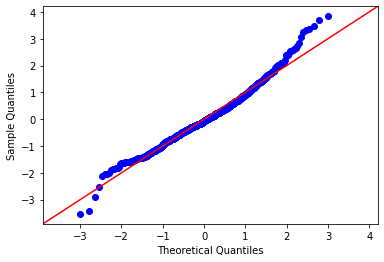

In [35]:
resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

#### Homoscedasticity
Plots don't show a cone like pattern

Text(0, 0.5, 'Residuals')

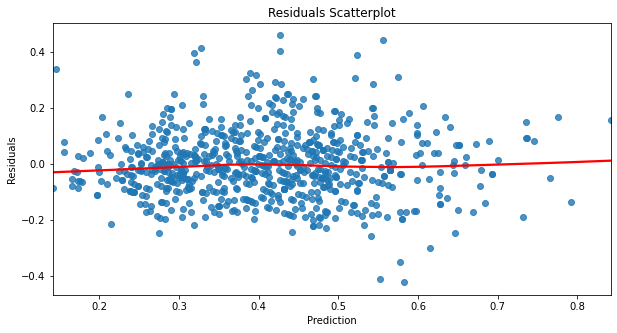

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')
plt.xlabel('Prediction')
plt.ylabel('Residuals')

#### Training
Training and test MSE is similar so we can expect the model to perform similarly on different data.
Accuracy of the model is 51.43%

In [37]:
y = dependent
X = predictors
X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.015127276429836516
Test Mean Squared Error: 0.01200812854901391


In [38]:
Accuracy=r2_score(y_test,y_hat_test)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 51.43


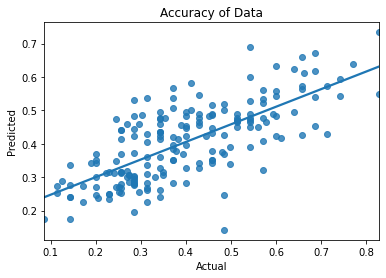

In [39]:
plot = sns.regplot(x=y_test,y=y_hat_test,ci=None).set(title='Accuracy of Data', xlabel='Actual', ylabel='Predicted');

### Conclusion
The best 2 predictors for our model is HP and defence which is also highlighted from the correlation matrix. With an accuracy of 50% this model may not be enough to provide players with enough insight on the upcoming generation of Pokémon. Even if our model had high accuracy with predicting the attack of the new generation there are so many other factors to account for.<br />
Having high attack doesn't mean it is a top tier Pokémon to use as the other stats like speed may be a lot lower meaning that Pokémon attacks second. There are also varying skills and other game mechanics that can change the outcome of a high attack Pokémon versus a low attack Pokémon. <br />
